In [1]:
#importing all of the libraries that will be needed
import pandas as pd 
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
import statistics as stats
from IPython.display import display, HTML

In [2]:
# Inserting some images that is related to the assignment topic

# Paths to my image files
image_paths = ['11.jpg', '12.jpg', '13.jpg']

# Generate HTML code to display images side by side
images_html = ''.join([f'<img src="{path}" style="width: 310px; margin: 0px; float: left;" />' for path in image_paths])

# Display HTML code
display(HTML(images_html))

In [3]:
#Read files from the URL into the pandas DataFrame
# make sure to reference where you got the dataswt (CSO - Tourism)
url = "airandtravel1.csv"
df = pd.read_csv(url) 

## Where did Ireland's Tourists Come From? Cleaning and Preperation
This section will aim use data preperation methods such a `.head()` , `.shape`, `describe`, `info.()` etc to clean and sort the data first

In [4]:
# is there an increase in certain countries? Let's experiment 
# which countries spent the most money, are they increasling spending money YoY
# how much money can ireland expect in 2024/2025 : ML

#Using .head() to get a sense for the data, its structure and content
df.head()

,STATISTIC Label,Year,Month,Country,Direction,UNIT,VALUE
0,Air and Sea Travel,2010,January,Great Britain,Arrivals,Thousand,361.5
1,Air and Sea Travel,2010,January,Great Britain,Departures,Thousand,407.6
2,Air and Sea Travel,2010,January,Other UK (1),Arrivals,Thousand,0.9
3,Air and Sea Travel,2010,January,Other UK (1),Departures,Thousand,1.1
4,Air and Sea Travel,2010,January,Belgium,Arrivals,Thousand,12.5


In [5]:
df.shape

(6084, 7)

In [6]:
# Count occurrences of "thousand" in the 'UNIT' feature. If 100% of data in this unit is thousand we will drop the column
#Reason for this is it is ir
thousand_count = (df['UNIT'] == 'Thousand').sum()

# Calculating total number of observations
total_rows = len(df)

# Calculate percentage of times out of 100 that 'Thousand' was the unit of measurement 
percentage_thousand = (thousand_count / total_rows) * 100

print("Percentage of 'thousand' in the 'UNIT' column:", percentage_thousand)

# for report - need reference 
#it's perfectly fine to drop a column if it contains the exact same value for all rows in the DataFrame, especially if that value doesn't provide any additional information beyond what's already known or can be communicated through metadata or other means.
#In your case, if the 'UNIT' column contains the same value ('thousands') for all rows and this information is already conveyed to the reader or user of the data, there's no need to keep that column in the DataFrame. You can safely drop it to simplify the structure of your DataFrame and make it more efficient.
#Dropping such redundant columns can improve the clarity and efficiency of your data analysis and visualization processes


Percentage of 'thousand' in the 'UNIT' column: 100.0


In [7]:
#another way to do the above is to run a .decribe with objects to see how many unique data is in each column
# Summary statistics for categorical columns
print(df.describe(include=['object']))

#here i can see unit only has one piece of data and that is thousand 

           STATISTIC Label    Month        Country Direction      UNIT
count                 6084     6084           6084      6084      6084
unique                   1       12             18         2         1
top     Air and Sea Travel  January  Great Britain  Arrivals  Thousand
freq                  6084      540            338      3042      6084


In [8]:
# Drop the 'UNIT' column
df.drop(columns=['UNIT'], inplace=True)

In [9]:
# only keep the observations that are arrivals
df_update = df[df['Direction'] == 'Arrivals']

In [10]:
# check to see the head 
df_update.head()

,STATISTIC Label,Year,Month,Country,Direction,VALUE
0,Air and Sea Travel,2010,January,Great Britain,Arrivals,361.5
2,Air and Sea Travel,2010,January,Other UK (1),Arrivals,0.9
4,Air and Sea Travel,2010,January,Belgium,Arrivals,12.5
6,Air and Sea Travel,2010,January,Germany,Arrivals,45.3
8,Air and Sea Travel,2010,January,Spain,Arrivals,68.6


In [11]:
df_update.describe()
# because only value and year is an integer type (float) I am only returned with two coulmn of data for my statistical analsis 

,Year,VALUE
count,3042.000000,3040.000000
mean,2016.544379,136.478717
std,4.060805,316.040078
min,2010.000000,0.000000
25%,2013.000000,12.800000
50%,2017.000000,36.000000
75%,2020.000000,85.900000
max,2024.000000,2270.700000


## Clean the data

In [12]:
df_update.isnull().sum()

STATISTIC Label    0
Year               0
Month              0
Country            0
Direction          0
VALUE              2
dtype: int64

In [13]:
# Checking against some malform data - get reference about malform data
mal = ["n.a", "?", "NA", "n/a", "na", "--"]
df_update = pd.read_csv("airandtravel1.csv" , na_values=mal)

In [14]:
df_update.isnull().sum()

STATISTIC Label    0
Year               0
Month              0
Country            0
Direction          0
UNIT               0
VALUE              4
dtype: int64

In [15]:
mean_value = df_update['VALUE'].mean()

# Fill NaN values with the mean of VALUE - give reference in report as to why this is important
df_update['VALUE'].fillna(mean_value, inplace=True)

In [16]:
# Now my dataset is clean and there are no NaN, mal or missing values
df_update.isnull().sum()

STATISTIC Label    0
Year               0
Month              0
Country            0
Direction          0
UNIT               0
VALUE              0
dtype: int64

## Where did Ireland's Tourists Come From? Comparative analysis 2010,2016,2023
## Data Visualisation

In [17]:
# Filter the DataFrame for the desired year (e.g., 2023)
df_23 = df[df['Year'] == 2023]

# Group by 'Country' and calculate the sum of 'Value' for each country
country_visitors = df_23.groupby('Country')['VALUE'].sum()

# Calculate the total number of visitors
total_visitors = country_visitors.sum()

# Calculate the percentage of visitors for each country
country_percentages = (country_visitors / total_visitors) * 100

# Create a new DataFrame to store the results
result_df_23 = pd.DataFrame({'Country': country_percentages.index, 'Percentage of Visitors': country_percentages.values})

# Display the result
print(result_df_23)


                                              Country  Percentage of Visitors
0                                       All countries               49.999758
1                                             Belgium                0.616937
2                                              France                3.437150
3                                             Germany                2.452475
4                                       Great Britain               17.451433
5                                               Italy                2.436355
6                                         Netherlands                1.761482
7                                 Other Countries(42)                1.117880
8                                   Other Europe (34)                0.499973
9                    Other Transatlantic Countries(1)                0.630997
10                                       Other UK (1)                0.084480
11                                             Poland           

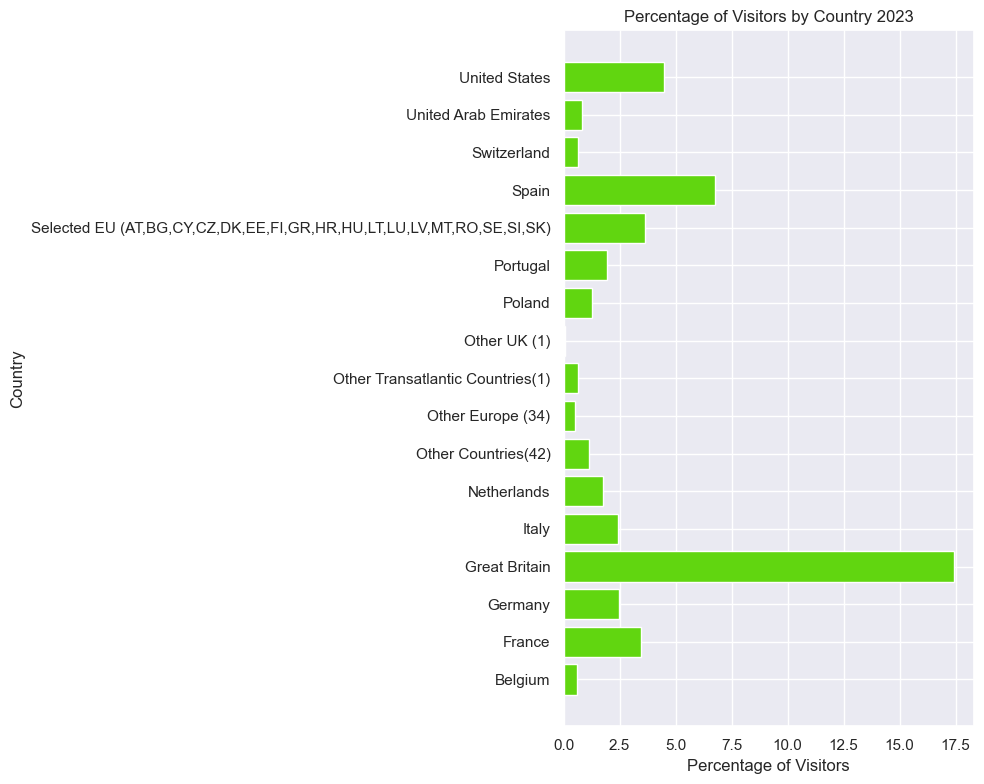

In [18]:
# removing all countries as skews data
df_filtered = result_df_23[result_df_23['Country'] != 'All countries']


# Plotting the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(df_filtered['Country'], df_filtered['Percentage of Visitors'], color='#61d610',)
plt.xlabel('Percentage of Visitors')
plt.ylabel('Country')
plt.title('Percentage of Visitors by Country 2023')
plt.tight_layout()
plt.show()


In [19]:
# Filter the DataFrame for the desired year (e.g., 2023)
df_16 = df[df['Year'] == 2016]

# Group by 'Country' and calculate the sum of 'Value' for each country
country_visitors = df_16.groupby('Country')['VALUE'].sum()

# Calculate the total number of visitors
total_visitors = country_visitors.sum()

# Calculate the percentage of visitors for each country
country_percentages = (country_visitors / total_visitors) * 100

# Create a new DataFrame to store the results
result_df_16 = pd.DataFrame({'Country': country_percentages.index, 'Percentage of Visitors': country_percentages.values})

# Display the result
print(result_df_16)

                                              Country  Percentage of Visitors
0                                       All countries               50.000427
1                                             Belgium                0.719544
2                                              France                3.210274
3                                             Germany                2.830226
4                                       Great Britain               21.290797
5                                               Italy                1.850724
6                                         Netherlands                1.748704
7                                 Other Countries(42)                0.373361
8                                   Other Europe (34)                0.377629
9                    Other Transatlantic Countries(1)                0.490747
10                                       Other UK (1)                0.094194
11                                             Poland           

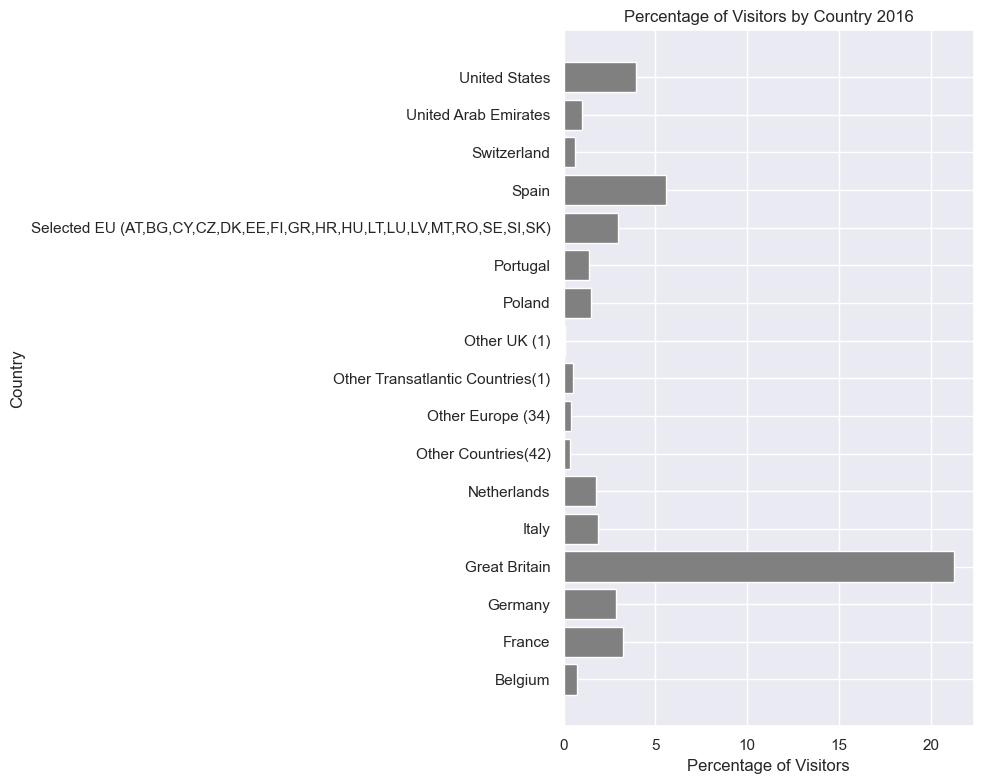

In [20]:
# removing all countries as skews data
df_filtered = result_df_16[result_df_16['Country'] != 'All countries']


# Plotting the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(df_filtered['Country'], df_filtered['Percentage of Visitors'], color='gray',)
plt.xlabel('Percentage of Visitors')
plt.ylabel('Country')
plt.title('Percentage of Visitors by Country 2016')
plt.tight_layout()
plt.show()

In [21]:
# Filter the DataFrame for the desired year (e.g., 2023)
df_10 = df[df['Year'] == 2010]

# Group by 'Country' and calculate the sum of 'Value' for each country
country_visitors = df_10.groupby('Country')['VALUE'].sum()

# Calculate the total number of visitors
total_visitors = country_visitors.sum()

# Calculate the percentage of visitors for each country
country_percentages = (country_visitors / total_visitors) * 100

# Create a new DataFrame to store the results
result_df_10 = pd.DataFrame({'Country': country_percentages.index, 'Percentage of Visitors': country_percentages.values})

# Display the result
print(result_df_10)

                                              Country  Percentage of Visitors
0                                       All countries               50.000000
1                                             Belgium                0.631429
2                                              France                3.661356
3                                             Germany                2.581092
4                                       Great Britain               23.607217
5                                               Italy                1.747707
6                                         Netherlands                1.292289
7                                 Other Countries(42)                0.473039
8                                   Other Europe (34)                0.276891
9                    Other Transatlantic Countries(1)                0.168265
10                                       Other UK (1)                0.103592
11                                             Poland           

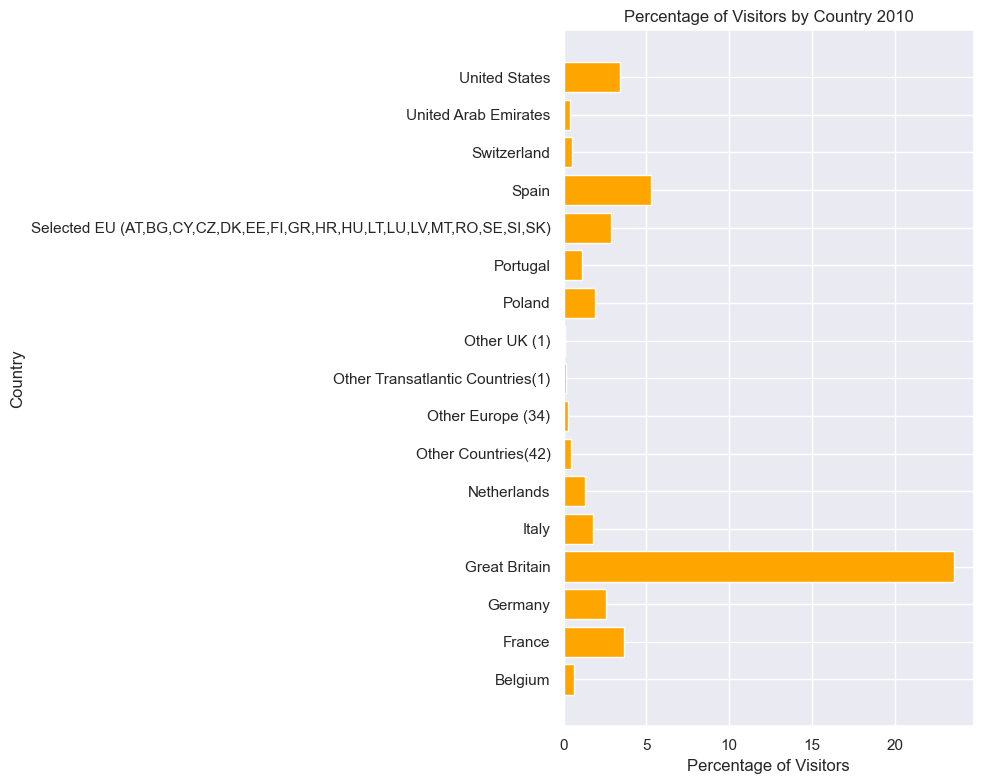

In [22]:
# removing all countries as skews data
df_filtered = result_df_10[result_df_10['Country'] != 'All countries']


# Plotting the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(df_filtered['Country'], df_filtered['Percentage of Visitors'], color='orange',)
plt.xlabel('Percentage of Visitors')
plt.ylabel('Country')
plt.title('Percentage of Visitors by Country 2010')
plt.tight_layout()
plt.show()

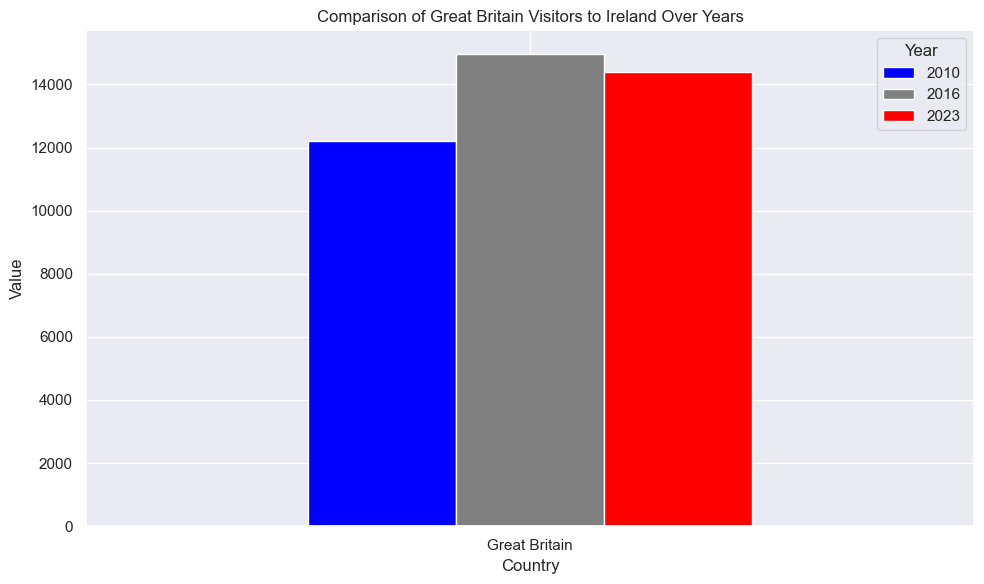

In [23]:
years = [2010, 2016, 2023]
df_filtered = df[(df['Year'].isin(years)) & (df['Country'] == 'Great Britain')]

colors = ['blue', 'gray', 'red']

# Group by 'Year' and sum the 'VALUE' column
df_grouped = df_filtered.groupby(['Country', 'Year']).sum().reset_index()

# Pivot the DataFrame to have years as columns and 'VALUE' as values
pivot_df = df_grouped.pivot(index='Country', columns='Year', values='VALUE')

# Plotting the bar plot
pivot_df.plot(kind='bar', figsize=(10, 6),color=colors)
plt.title('Comparison of Great Britain Visitors to Ireland Over Years')
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()
plt.show()



In [24]:
# Filter the DataFrame for the desired year (e.g., 2023)
df_all = df[df['Year'] >= 2010]

# Group by 'Country' and calculate the sum of 'Value' for each country
country_visitors = df_all.groupby('Country')['VALUE'].sum()

# Calculate the total number of visitors
total_visitors = country_visitors.sum()

# Calculate the percentage of visitors for each country
country_percentages = (country_visitors / total_visitors) * 100

# Create a new DataFrame to store the results
result_df_all = pd.DataFrame({'Country': country_percentages.index, 'Percentage of Visitors': country_percentages.values})

# Display the result
print(result_df_all)

                                              Country  Percentage of Visitors
0                                       All countries               49.999747
1                                             Belgium                0.680448
2                                              France                3.304809
3                                             Germany                2.799449
4                                       Great Britain               20.446636
5                                               Italy                1.964503
6                                         Netherlands                1.683486
7                                 Other Countries(42)                0.633913
8                                   Other Europe (34)                0.417672
9                    Other Transatlantic Countries(1)                0.465062
10                                       Other UK (1)                0.087712
11                                             Poland           

In [25]:
import pandas as pd

# Filter out the row with 'All countries'
result_df_filtered = result_df_all[result_df_all['Country'] != 'All countries']

# Sort the filtered DataFrame by the 'Percentage of Visitors' column in descending order
sorted_df = result_df_filtered.sort_values(by='Percentage of Visitors', ascending=False)

# Get the top 5 countries
top_5_countries = sorted_df.head(5)

# Display the top 5 countries in a table
print(top_5_countries)

                                              Country  Percentage of Visitors
4                                       Great Britain               20.446636
14                                              Spain                5.756383
17                                      United States                4.059557
2                                              France                3.304809
13  Selected EU (AT,BG,CY,CZ,DK,EE,FI,GR,HR,HU,LT,...                3.240298


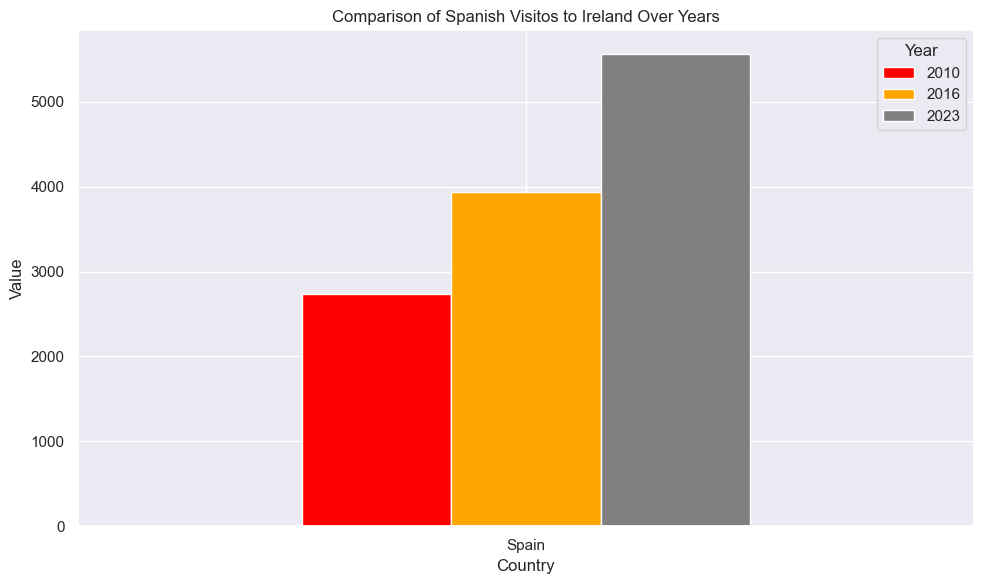

In [26]:
years = [2010, 2016, 2023]
df_filtered = df[(df['Year'].isin(years)) & (df['Country'] == 'Spain')]

colors = ['Red', 'Orange', 'Gray']

# Group by 'Year' and sum the 'VALUE' column
df_grouped = df_filtered.groupby(['Country', 'Year']).sum().reset_index()

# Pivot the DataFrame to have years as columns and 'VALUE' as values
pivot_df = df_grouped.pivot(index='Country', columns='Year', values='VALUE')

# Plotting the bar plot
pivot_df.plot(kind='bar', figsize=(10, 6),color=colors)
plt.title('Comparison of Spanish Visitos to Ireland Over Years')
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


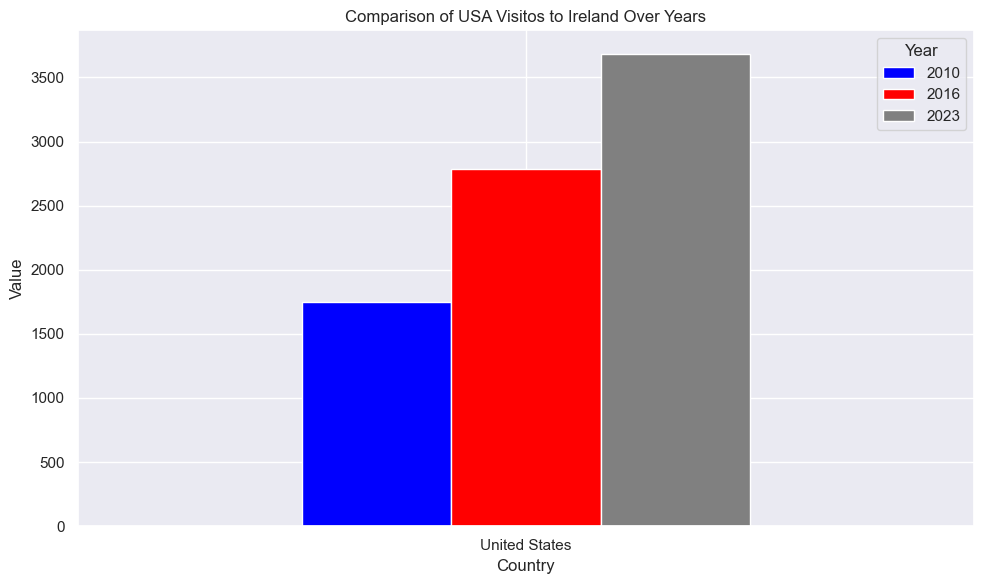

In [27]:
years = [2010, 2016, 2023]
df_filtered = df[(df['Year'].isin(years)) & (df['Country'] == 'United States')]

colors = ['Blue', 'Red', 'Gray']

# Group by 'Year' and sum the 'VALUE' column
df_grouped = df_filtered.groupby(['Country', 'Year']).sum().reset_index()

# Pivot the DataFrame to have years as columns and 'VALUE' as values
pivot_df = df_grouped.pivot(index='Country', columns='Year', values='VALUE')

# Plotting the bar plot
pivot_df.plot(kind='bar', figsize=(10, 6),color=colors)
plt.title('Comparison of USA Visitos to Ireland Over Years')
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

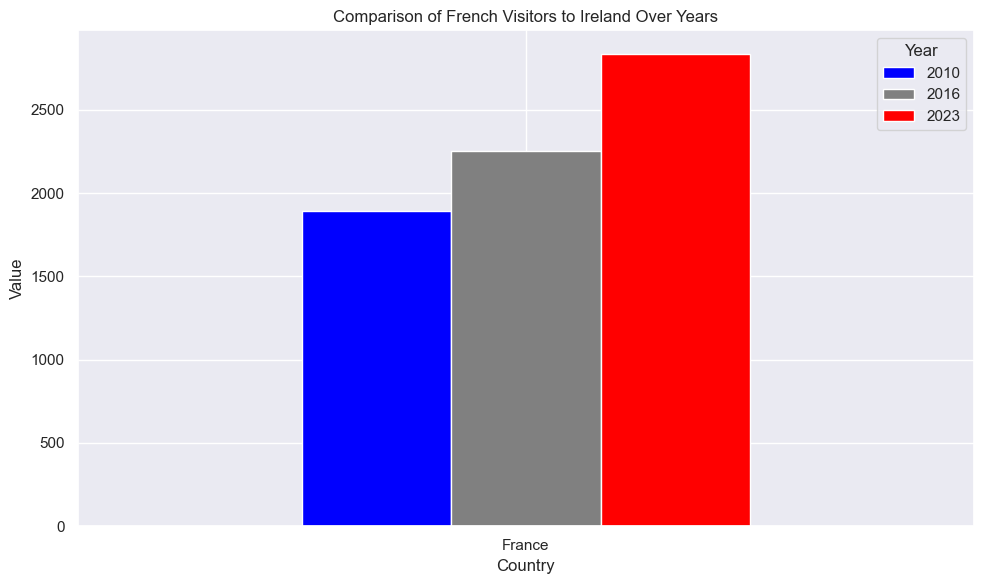

In [28]:
years = [2010, 2016, 2023]
df_filtered = df[(df['Year'].isin(years)) & (df['Country'] == 'France')]

colors = ['Blue', 'Gray', 'Red']

# Group by 'Year' and sum the 'VALUE' column
df_grouped = df_filtered.groupby(['Country', 'Year']).sum().reset_index()

# Pivot the DataFrame to have years as columns and 'VALUE' as values
pivot_df = df_grouped.pivot(index='Country', columns='Year', values='VALUE')

# Plotting the bar plot
pivot_df.plot(kind='bar', figsize=(10, 6),color=colors)
plt.title('Comparison of French Visitors to Ireland Over Years')
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


In [29]:
# Create a function so I can check the % increase on any country for any year 

def calculate_percentage_change(df, country_of_interest, initial_year, final_year):
    df_initial = df[(df['Year'] == initial_year) & (df['Country'] == country_of_interest)]
    total_visitors_initial = df_initial['VALUE'].sum()

    # Filter the DataFrame for the final year and calculate the total number of tourists visiting the specified country
    df_final = df[(df['Year'] == final_year) & (df['Country'] == country_of_interest)]
    total_visitors_final = df_final['VALUE'].sum()

    # Calculate the percentage change in tourists visiting the specified country
    percentage_change = ((total_visitors_final - total_visitors_initial) / total_visitors_initial) * 100

    return percentage_change

In [30]:
# Call the function here to check on country % of tourist increase or decrease through a range of years

country_of_interest = 'Germany'
initial_year = 2016
final_year = 2023
percentage_change_spain = calculate_percentage_change(df, country_of_interest, initial_year, final_year)
print(f"Percentage change in tourists visiting {country_of_interest} from {initial_year} to {final_year}: {percentage_change_spain:.2f}%")


Percentage change in tourists visiting Germany from 2016 to 2023: 1.72%


## Decriptive Statistics

In [31]:
# Calculate total tourists for each year
total_tourists_per_year = df_update.groupby('Year')['VALUE'].sum()
print(total_tourists_per_year)

Year
2010    51644.800000
2011    52319.000000
2012    52607.600000
2013    54575.700000
2014    58235.600000
2015    64477.700000
2016    70280.600000
2017    73696.500000
2018    77705.100000
2019    80700.300000
2020    17825.000000
2021    20502.918553
2022    68859.000000
2023    82504.400000
2024     5168.400000
Name: VALUE, dtype: float64


<Axes: title={'center': 'Total Tourists Visiting Ireland per Year'}, xlabel='Year', ylabel='Total Tourists'>

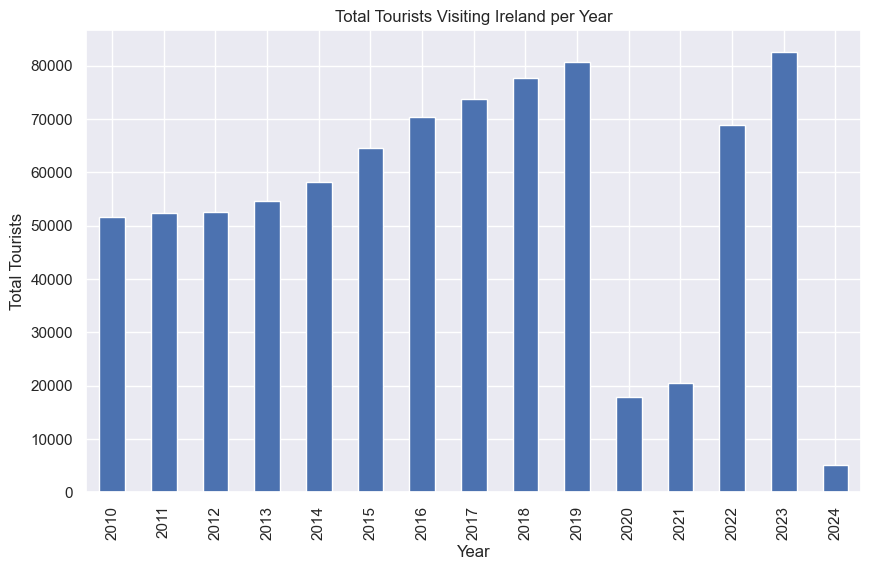

In [32]:
# Plot total tourists per year
total_tourists_per_year.plot(kind='bar', figsize=(10, 6), xlabel='Year', ylabel='Total Tourists', title='Total Tourists Visiting Ireland per Year')


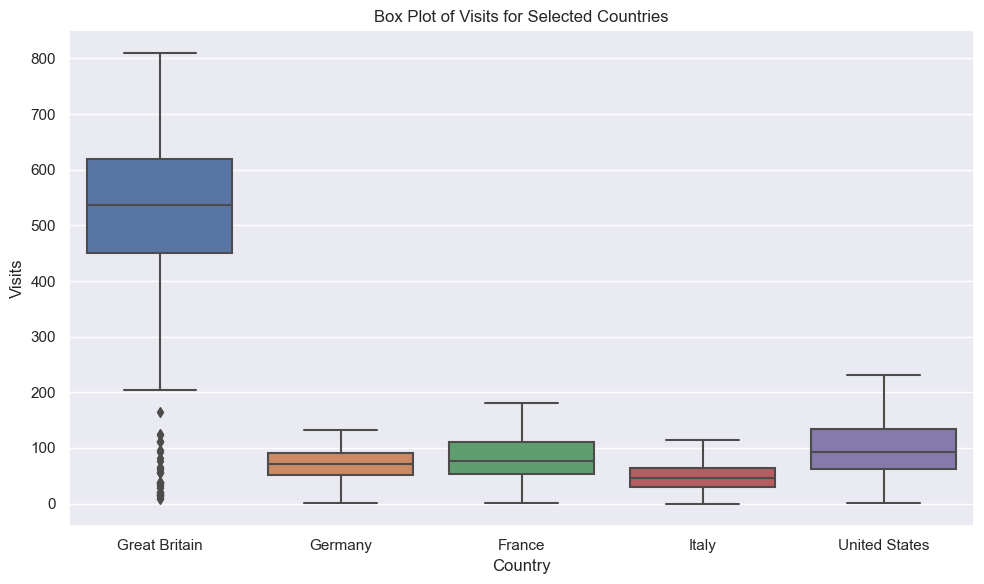

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming your DataFrame is named 'df' and contains columns 'Country' and 'Visits'
#df_boxplot = pd.DataFrame(df)

# Filter the DataFrame for specified countries
countries_of_interest = ['France', 'Italy', 'Germany', 'United States', 'Great Britain']
df_interest = df[df['Country'].isin(countries_of_interest)]

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='VALUE', data=df_interest)
plt.title('Box Plot of Visits for Selected Countries')
plt.xlabel('Country')
plt.ylabel('Visits')
plt.tight_layout()
plt.show()


In [34]:
from scipy.stats import skew

# Assuming your DataFrame is named 'df' and contains columns 'Country' and 'VALUE'
countries_of_interest = ['France', 'Italy', 'Germany', 'United States', 'Great Britain']

for country in countries_of_interest:
    country_data = df[df['Country'] == country]['VALUE']
    skewness = skew(country_data)
    print(f"Skewness for {country}: {skewness}")


Skewness for France: 0.10869137882935194
Skewness for Italy: 0.31584099260980303
Skewness for Germany: -0.3847965454000122
Skewness for United States: 0.2779969746293352
Skewness for Great Britain: -1.1934026600434084


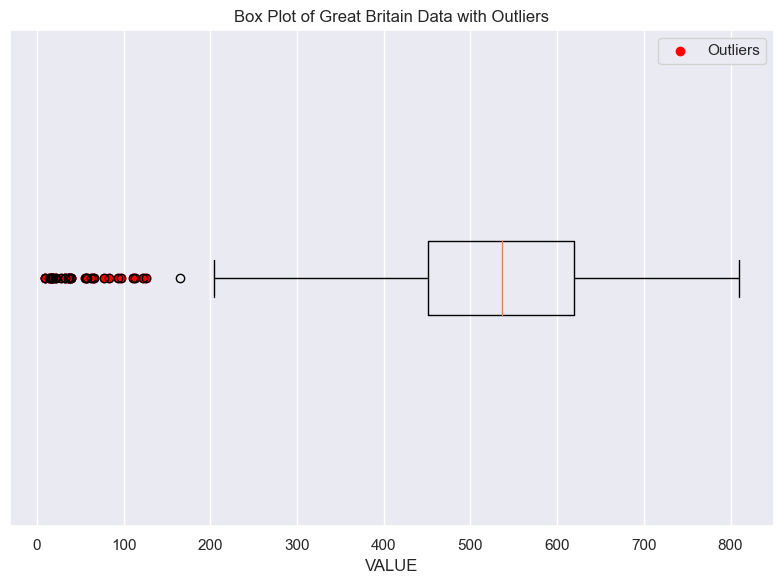

In [35]:
from scipy.stats import zscore

great_britain_data = df[df['Country'] == 'Great Britain']['VALUE']

# Calculate Z-scores for Great Britain data
z_scores = zscore(great_britain_data)

# Define threshold for outlier detection (e.g., Z-score > 2)
threshold = 2

# Filter outliers based on threshold
outliers = great_britain_data[abs(z_scores) > threshold]

# Visualize outliers using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(great_britain_data, vert=False)
plt.scatter(outliers, [1] * len(outliers), color='red', label='Outliers')
plt.title('Box Plot of Great Britain Data with Outliers')
plt.xlabel('VALUE')
plt.yticks([])
plt.legend()
plt.tight_layout()
plt.show()

# explain why its important that i identified the outliers 


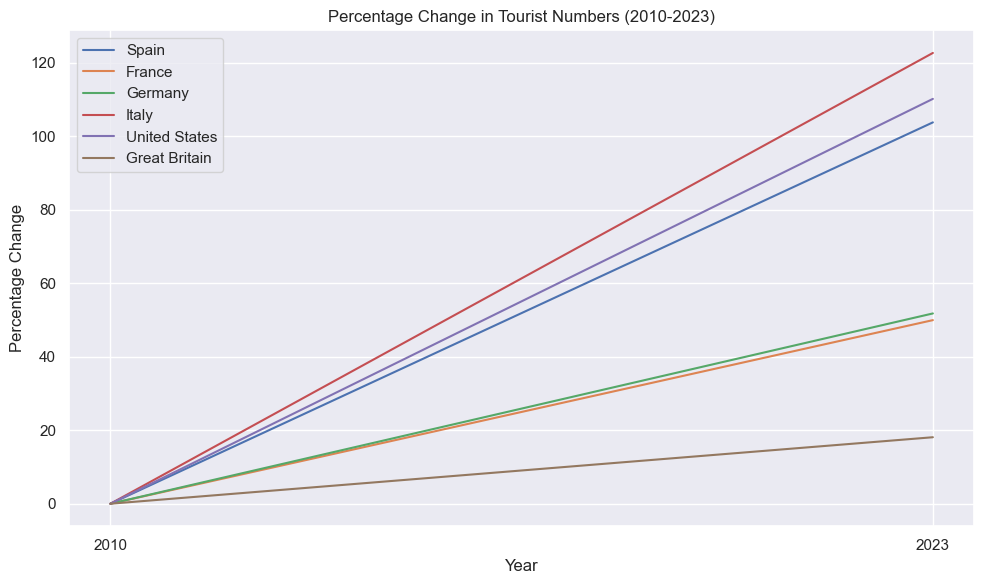

In [36]:
import pandas as pd
import matplotlib.pyplot as plt


def calculate_percentage_change(df, country_of_interest, initial_year, final_year):
    # Filter the DataFrame for the initial year and calculate the total number of tourists visiting the specified country
    df_initial = df[(df['Year'] == initial_year) & (df['Country'] == country_of_interest)]
    total_visitors_initial = df_initial['VALUE'].sum()

    # Filter the DataFrame for the final year and calculate the total number of tourists visiting the specified country
    df_final = df[(df['Year'] == final_year) & (df['Country'] == country_of_interest)]
    total_visitors_final = df_final['VALUE'].sum()

    # Calculate the percentage change in tourists visiting the specified country
    percentage_change = ((total_visitors_final - total_visitors_initial) / total_visitors_initial) * 100

    return percentage_change

# List of countries to analyze
countries_of_interest = ['Spain', 'France', 'Germany', 'Italy', 'United States', 'Great Britain']

# Years for analysis
initial_year = 2010
final_year = 2023

# Calculate percentage change for each country
percentage_changes = {}
for country in countries_of_interest:
    percentage_changes[country] = calculate_percentage_change(df, country, initial_year, final_year)

# Plotting
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    plt.plot([initial_year, final_year], [0, percentage_changes[country]], label=country)

plt.title('Percentage Change in Tourist Numbers (2010-2023)')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.xticks([initial_year, final_year])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


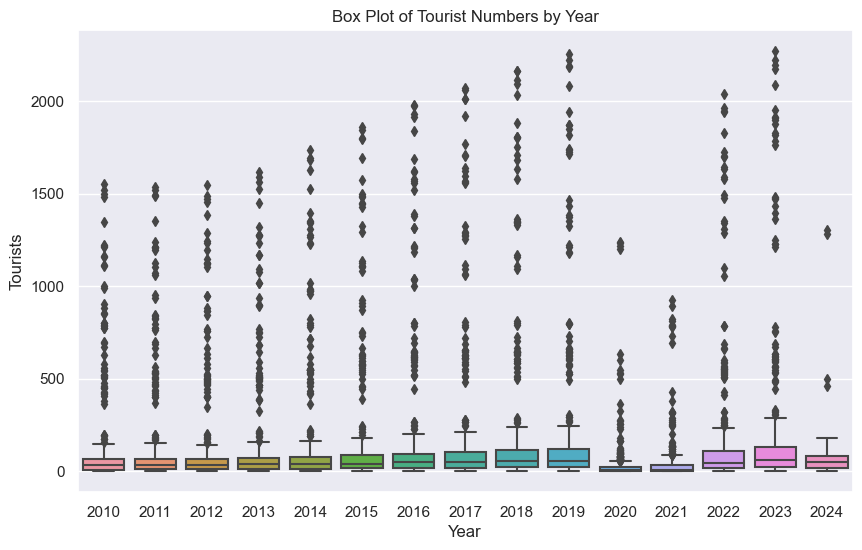

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='VALUE', data=df_update)
plt.title('Box Plot of Tourist Numbers by Year')
plt.xlabel('Year')
plt.ylabel('Tourists')
plt.show()

In [ ]:
#Poisson number of events occuring within a giving time
# number of tourists, into ireland, since 2010

In [41]:
from scipy.stats import poisson
mean_arrival_rate_2010_to_2023 = df_update['VALUE'].mean()

# Generate random variates (samples) from a Poisson distribution using the mean arrival rate
x_rvs = poisson.rvs(mean_arrival_rate_2010_to_2023, size=23, random_state=2)
print(f"The mean arrival rate from 2010 to 2023 is: {mean_arrival_rate_2010_to_2023}")

The mean arrival rate from 2010 to 2023 is: 136.60463815789473


In [43]:
x_rvs = np.random.poisson(mean_arrival_rate_2010_to_2023, size=100)

# Count the occurrences of each value and create a dictionary
df_update = dict(zip(*np.unique(x_rvs, return_counts=True)))

# Print the dictionary
print(df_update)

#This distribution can provide insights into the variability and common patterns in tourist arrivals over the years.

{102: 1, 113: 1, 115: 2, 117: 1, 118: 2, 119: 2, 120: 2, 124: 5, 125: 3, 127: 1, 128: 5, 129: 2, 130: 4, 131: 5, 132: 2, 133: 2, 134: 3, 135: 4, 137: 2, 138: 1, 139: 5, 140: 3, 141: 7, 142: 7, 143: 2, 144: 1, 145: 2, 146: 6, 147: 4, 148: 1, 149: 3, 150: 1, 151: 1, 152: 1, 154: 1, 155: 2, 156: 1, 160: 1, 162: 1}


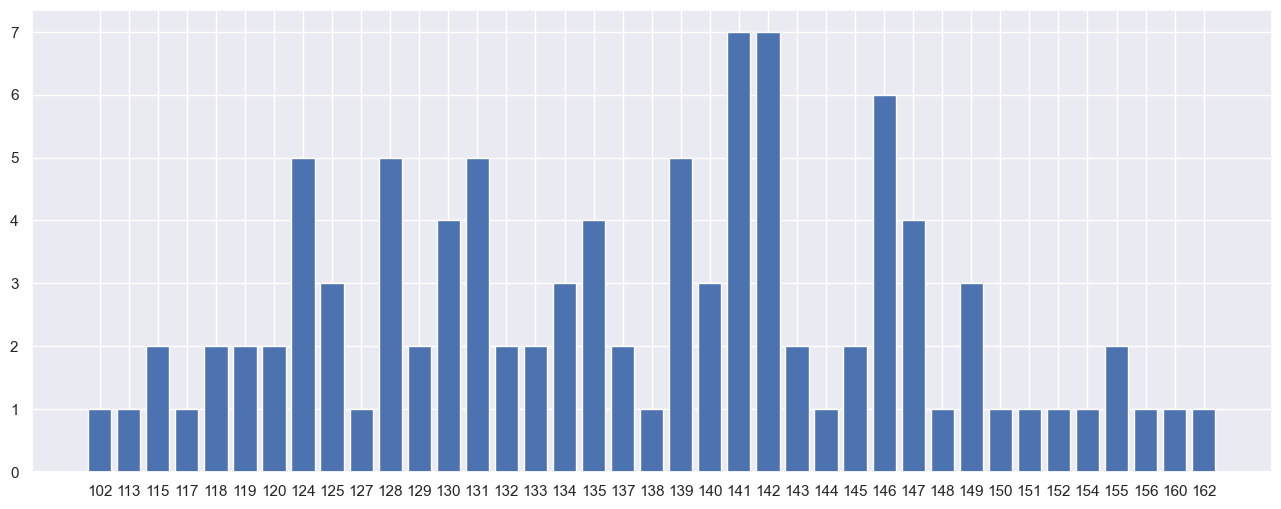

In [46]:
fig, ax = plt.subplots(figsize=(16,6))
ax.bar(range(len(df_update)), list(df_update.values()), align = 'center')
plt.xticks(range(len(df_update)), list(df_update.keys()))
plt.show()

#You can analyze the distribution to identify common trends

If you're interested in modeling the total number of tourists arriving in Ireland for an entire year, considering it as a continuous flow of arrivals over time, the Poisson distribution may be more appropriate.

If you're interested in modeling the arrivals on a day-to-day basis or if the arrivals can be considered as a series of independent trials with a fixed probability of success (arrival) in each trial, the binomial distribution might be more suitable.